<a href="https://colab.research.google.com/github/aaloktiwariofficial/ML-DS/blob/main/8_Sentiment_Analysis_10th_September%2C_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis
Sentiment analysis is a technique used to determine the emotional tone or sentiment expressed in a text. It involves analyzing the words and phrases used in the text to identify the underlying sentiment, whether it is positive, negative, or neutral.

[Image Source](https://www.oreilly.com/api/v2/epubs/9781492074076/files/assets/btap_0401.png)
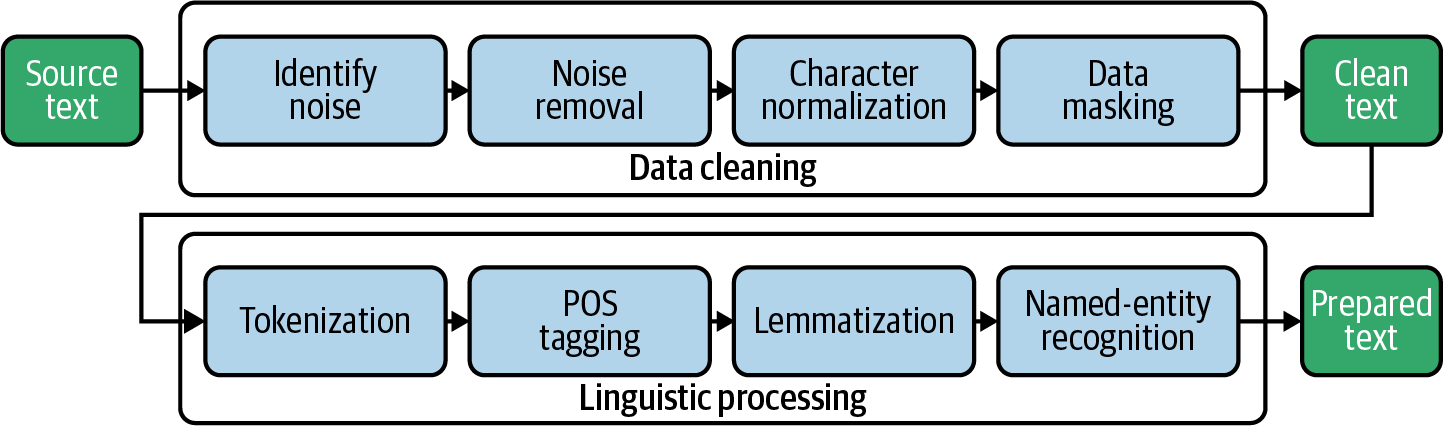

## Lexicon-based analysis
This type of analysis, such as the [NLTK Vader sentiment analyzer](https://github.com/cjhutto/vaderSentiment), involves using a set of predefined rules and heuristics to determine the sentiment of a piece of text. These rules are typically based on lexical and syntactic features of the text, such as the presence of positive or negative words and phrases.


### Basic Setup

In [ ]:
!pip install nltk

In [ ]:
# import libraries
import pandas as pd
pd.set_option('display.max_colwidth', None)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

### Loading the dataset

In [ ]:
# Load the amazon review dataset
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff,1
1,This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.,1
2,this is a really cool game. there are a bunch of levels and you can find golden eggs. super fun.,1
3,"This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.",1
4,This is a terrific game on any pad. Hrs of fun. My grandkids love it. Great entertainment when waiting in long lines,1


### Preprocessing the text
**Tokenization** is a text preprocessing step in sentiment analysis that involves breaking down the text into individual words or tokens. This is an essential step in analyzing text data as it helps to separate individual words from the raw text, making it easier to analyze and understand. Tokenization is typically performed using NLTK's built-in `word_tokenize` function, which can split the text into individual words and punctuation marks. <br> <br>
Stemming and lemmatization are techniques used to reduce words to their root forms. <br>
**Stemming** involves removing the suffixes from words, such as "ing" or "ed," to reduce them to their base form. For example, the word "jumping" would be stemmed to "jump."

**Lemmatization**, however, involves reducing words to their base form based on their part of speech. For example, the word "jumped" would be lemmatized to "jump," but the word "jumping" would be lemmatized to "jumping" since it is a present participle.

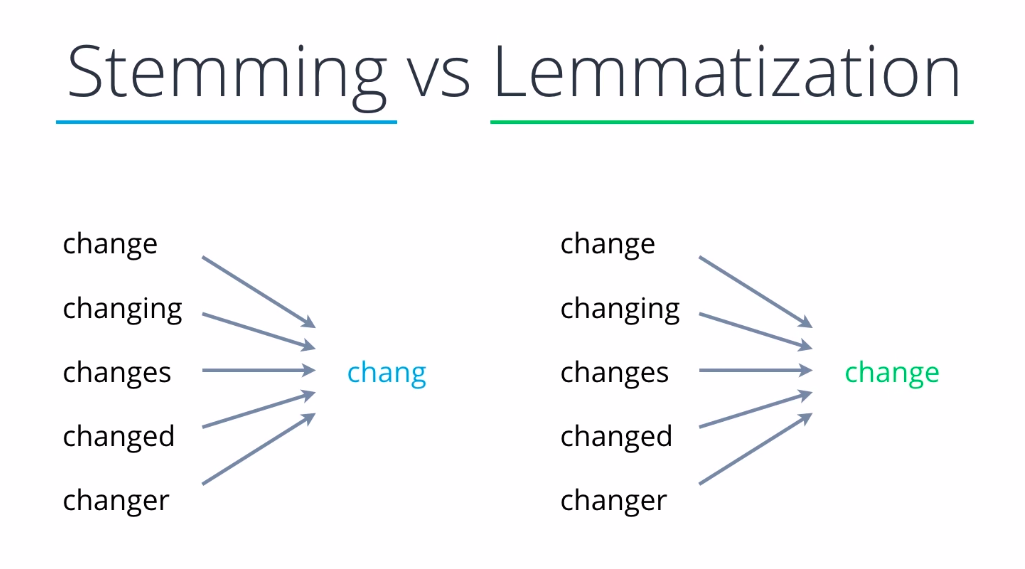

To conclude, stemming and lemmatization are techniques used for text processing in NLP. They both aim to reduce inflections down to common base root words, but each takes a different approach in doing so. The stemming approach is much faster than lemmatization but it’s more crude and can occasionally lead to unmeaningful common base roots. Alternatively, lemmatization is much more accurate than stemming in terms of finding meaningful dictionary words, and it takes context into consideration.

In [ ]:
# create linguistic_preprocessing function
def linguistic_preprocessing(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

df['reviewText'] = df['reviewText'].apply(linguistic_preprocessing)
df.head()

,reviewText,Positive
0,one best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff,1
1,pretty good version game free . lot different level play . kid enjoy lot .,1
2,really cool game . bunch level find golden egg . super fun .,1
3,"silly game frustrating , lot fun definitely recommend fun time .",1
4,terrific game pad . hr fun . grandkids love . great entertainment waiting long line,1


### NLTK Sentiment Analyzer

In [ ]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

df['sentiment'] = df['reviewText'].apply(get_sentiment)

df.head()

,reviewText,Positive,sentiment
0,one best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff,1,1
1,pretty good version game free . lot different level play . kid enjoy lot .,1,1
2,really cool game . bunch level find golden egg . super fun .,1,1
3,"silly game frustrating , lot fun definitely recommend fun time .",1,1
4,terrific game pad . hr fun . grandkids love . great entertainment waiting long line,1,1


### Evaluating

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['Positive'], df['sentiment']))

[[ 1131  3636]
 [  576 14657]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df['Positive'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



## ML-based Analysis

### NAIVE BAYES

Naive Bayes is based on Bayes' theorem, a probability theory. <br> <br>
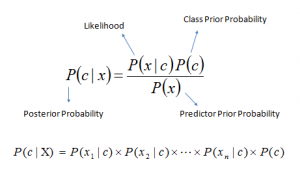
* P(c|x) is the posterior probability of class c (target) given predictor x (attributes).
* P(c) is the prior probability of class.
* P(x|c) is the likelihood which is the probability of the predictor given class.
* P(x) is the prior probability of the predictor.


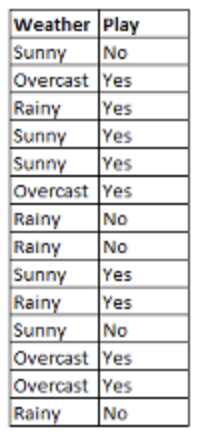

We have a data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

1. Convert the data set into a frequency table <br>
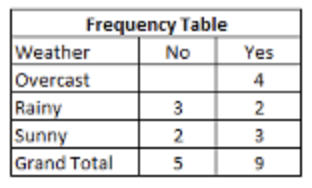
2. Create Likelihood table by finding the probabilities <br>
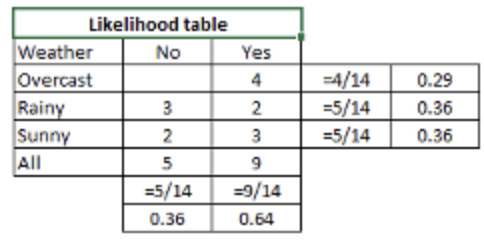
3. Use Naive Bayesian equation to calculate the posterior probability.
Players will play if the weather is sunny. Is this statement correct?


```

P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)

Here P( Sunny | Yes) * P(Yes) is in the numerator, and P (Sunny) is in the denominator.

Here we have P (Sunny |Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P(Yes)= 9/14 = 0.64

Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.


```



In [ ]:
# Load and prepare the dataset
import nltk
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

In [ ]:
# dataset view
 # [("words", "pos"),("words", "neg"), ("words", "pos")]

In [ ]:
# Define the feature extractor

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [ ]:
# Train Naive Bayes classifier
featuresets = [(document_features(d), c) for (d,c) in documents]
print(featuresets[0:4])
# [(1st most common word, True/False), (2nd most common word, True/False).... (2000th most common word, True/False)]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

[({'contains(,)': True, 'contains(the)': True, 'contains(.)': True, 'contains(a)': True, 'contains(and)': True, 'contains(of)': True, 'contains(to)': True, "contains(')": True, 'contains(is)': True, 'contains(in)': True, 'contains(s)': True, 'contains(")': False, 'contains(it)': True, 'contains(that)': True, 'contains(-)': True, 'contains())': True, 'contains(()': True, 'contains(as)': True, 'contains(with)': True, 'contains(for)': True, 'contains(his)': True, 'contains(this)': False, 'contains(film)': True, 'contains(i)': False, 'contains(he)': True, 'contains(but)': True, 'contains(on)': True, 'contains(are)': False, 'contains(t)': True, 'contains(by)': True, 'contains(be)': False, 'contains(one)': False, 'contains(movie)': True, 'contains(an)': True, 'contains(who)': False, 'contains(not)': False, 'contains(you)': True, 'contains(from)': False, 'contains(at)': True, 'contains(was)': True, 'contains(have)': False, 'contains(they)': False, 'contains(has)': True, 'contains(her)': False

In [ ]:
# Test the classifier
print(nltk.classify.accuracy(classifier, test_set))

0.77


## Sentiment Analysis using RNN

Imagine you want to teach a computer to understand and remember sequences of information, like a sentence. Regular computer programs struggle with this because they don't naturally remember previous steps. That's where RNNs (Recurrent Neural Networks) come in.

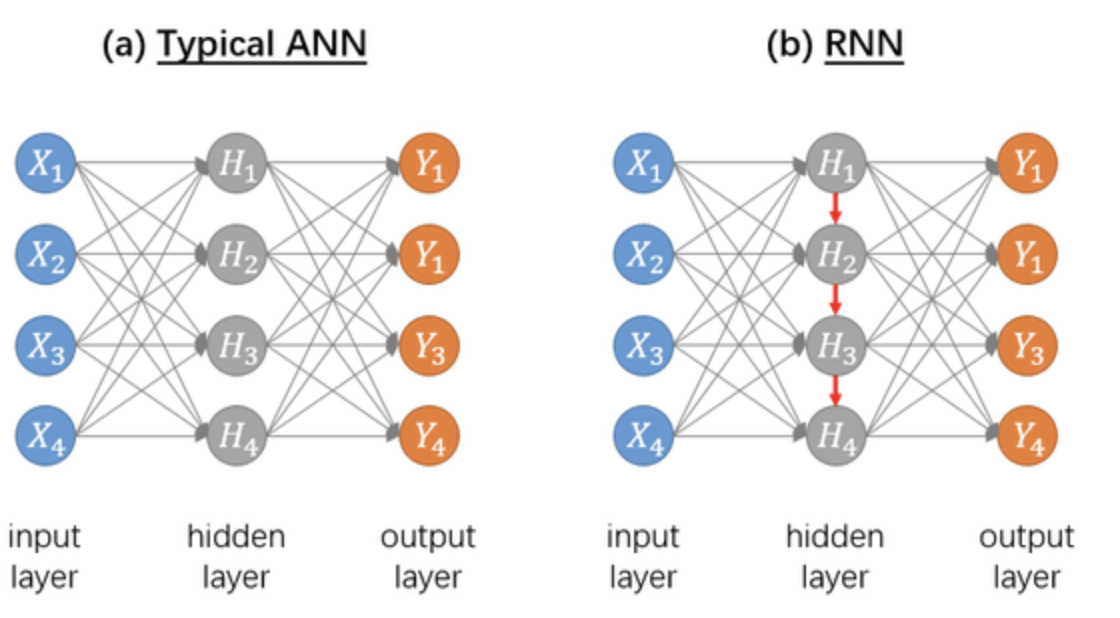

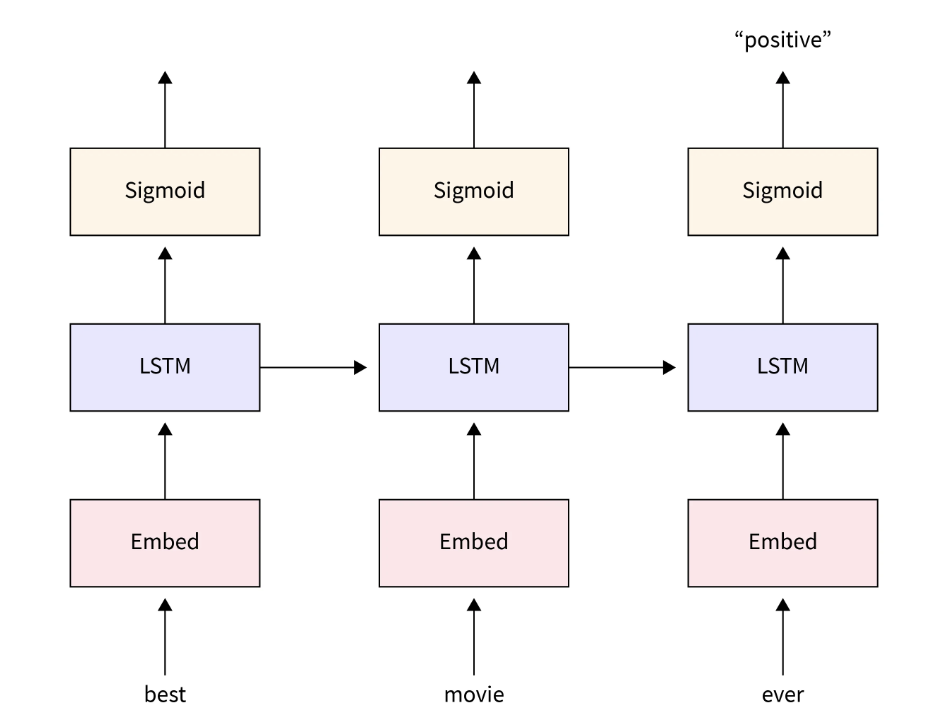

### LSTM Cell

An LSTM cell is like a tiny memory unit inside a computer program. It has three main parts:

* Input Gate: Think of this as a gatekeeper. It decides which new information to let in from the current input and whether to remember it or not.

* Forget Gate: This part helps the LSTM cell decide what information to forget from its previous memory. It's like cleaning out unnecessary stuff to make room for new things.

* Output Gate: This gate decides what information the LSTM cell should pass on to the next step in the sequence. It's like the LSTM cell deciding what to say or remember.

The cell has two states Cell State and Hidden State. They are continuously updated and carry the information from the previous to the current time steps.

The cell state is the “long-term” memory, while the hidden state is the “short-term” memory.

The forget gate and input gate update the cell state. <br>
The hidden state is computed using the output gate.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def lstm_cell(prev_c, prev_h, x_t, params):
    """
    LSTM cell implementation.

    Args:
    prev_c: Previous cell state (numpy array of shape (hidden_size,))
    prev_h: Previous hidden state (numpy array of shape (hidden_size,))
    x_t: Input at time step t (numpy array of shape (input_size,))
    params: Dictionary containing LSTM parameters - {'W_f', 'U_f', 'b_f', 'W_i', 'U_i', 'b_i', 'W_c', 'U_c', 'b_c', 'W_o', 'U_o', 'b_o'}

    Returns:
    next_c: Next cell state (numpy array of shape (hidden_size,))
    next_h: Next hidden state (numpy array of shape (hidden_size,))
    """
    W_f, U_f, b_f = params['W_f'], params['U_f'], params['b_f']
    W_i, U_i, b_i = params['W_i'], params['U_i'], params['b_i']
    W_c, U_c, b_c = params['W_c'], params['U_c'], params['b_c']
    W_o, U_o, b_o = params['W_o'], params['U_o'], params['b_o']

    # Input gate
    i_t = sigmoid(np.dot(prev_h, U_i) + np.dot(x_t, W_i) + b_i)

    # Forget gate
    f_t = sigmoid(np.dot(prev_h, U_f) + np.dot(x_t, W_f) + b_f)

    # Output gate
    o_t = sigmoid(np.dot(prev_h, U_o) + np.dot(x_t, W_o) + b_o)

    # Cell state
    c_t = np.tanh(np.dot(prev_h, U_c) + np.dot(x_t, W_c) + b_c)

    # Update cell state
    next_c = f_t * prev_c + i_t * c_t

    # Update hidden state
    next_h = o_t * np.tanh(next_c)

    return next_c, next_h


The intuition behind LSTM is that the Cell and Hidden states carry the previous information and pass it on to future time steps. The Cell state is aggregated with all the past data information and is the long-term information retainer. The Hidden state carries the output of the last cell, i.e. short-term memory. This combination of Long term and short-term memory techniques enables LSTM’s to perform well In time series and sequence data.

### Basic Imports

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

### Data Loading

In [ ]:
# Define the vocabulary size and sequence length
vocab_size = 10000
max_length = 200

# Load the IMDb dataset and split it into training and testing sets
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# Pad sequences to a fixed length
train_data = pad_sequences(train_data, maxlen=max_length, padding='pre', truncating='pre')
test_data = pad_sequences(test_data, maxlen=max_length, padding='pre', truncating='pre')

### Creating the LSTM model

In [ ]:
model = Sequential()

# Add an Embedding layer to convert integer-encoded words into dense vectors
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))

# Add an LSTM layer with dropout for sequence modeling
model.add(LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

# Add another LSTM layer for context modeling
model.add(LSTM(64))
model.add(tf.keras.layers.Dropout(0.2))

# Add a dense layer for classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the model

In [ ]:
epochs = 5
batch_size = 64

model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels))

Epoch 1/5
391/391 [==============================] - 277s 698ms/step - loss: 0.3842 - accuracy: 0.8247 - val_loss: 0.3030 - val_accuracy: 0.8713
Epoch 2/5
391/391 [==============================] - 276s 706ms/step - loss: 0.2310 - accuracy: 0.9108 - val_loss: 0.3157 - val_accuracy: 0.8668
Epoch 3/5
391/391 [==============================] - 266s 681ms/step - loss: 0.1639 - accuracy: 0.9394 - val_loss: 0.3540 - val_accuracy: 0.8484
Epoch 4/5
391/391 [==============================] - 267s 684ms/step - loss: 0.1213 - accuracy: 0.9556 - val_loss: 0.4057 - val_accuracy: 0.8624
Epoch 5/5
391/391 [==============================] - 270s 691ms/step - loss: 0.1411 - accuracy: 0.9489 - val_loss: 0.4949 - val_accuracy: 0.8511


### Evaluating the model

In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

782/782 [==============================] - 57s 73ms/step - loss: 0.4949 - accuracy: 0.8511
Test Loss: 0.4949
Test Accuracy: 0.8511


### Evaluating for one single data point

In [ ]:
def predict_sentiment(text):
    # Tokenize and pad the input text
    text_sequence = imdb.get_word_index()
    tokens = [text_sequence.get(word, 0) for word in text.split()]
    padded_sequence = pad_sequences([tokens], maxlen=max_length, padding='pre', truncating='pre')

    # Make the prediction
    prediction = model.predict(padded_sequence)

    # Interpret the prediction
    if prediction < 0.5:
        return "Positive"
    else:
        return "Negative"

# Example usage:
text = "This movie was not good"
sentiment = predict_sentiment(text)
print(f"Sentiment: {sentiment}")

1/1 [==============================] - 1s 852ms/step
Sentiment: Positive


# Bonus: Sentiment Analysis using Trasnformers

In [ ]:
!pip install transformers

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

# Load the pre-trained model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Example text for sentiment analysis
text = "I love this product! It's amazing."

# Tokenize and encode the text
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

In [ ]:
# Perform inference to get sentiment scores
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted sentiment label (e.g., positive, negative, neutral)
logits = outputs.logits
predicted_label = torch.argmax(logits, dim=1).item()

# Map the predicted label to a sentiment category
sentiment_labels = ["neutral", "positive", "negative"]
predicted_sentiment = sentiment_labels[predicted_label]

print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Sentiment: positive
